# 비어플 팀스터디 3조 코드 실습 예제
### Ridge & Lasso Regressoin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [23]:
#boston 데이터 세트 로드 
boston=load_boston()

In [24]:
#boston 데이터 세트 DF 변환
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
#boston 데이터 세트의 target 배열은 주택 가격이므로 price 칼럼으로 dataframe에 추가
bostonDF['PRICE']=boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**<변수 설명>**

- CRIM : 지역별 범죄 발생률
- ZN : 25,000평방피트를 초과하는 거주 지역 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS : 찰스 강에 대한 더미 변수 (강의 경계에 위치하는 경우 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방 개수
- AGE : 1940년 이전에 건축된 소유 주택 비율
- DIS : 5개 주요 고용센터까지의 가중 거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000달러당 재산 비율
- PTRATIO : 지역 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층 비율
- MEDV : 본인 소유 주택 가격(중앙값)

# Linear Regression Model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X_data, y_target, test_size=0.3, random_state=156)

In [8]:
#선형 회귀 OLS로 학습/예측/평가 수행.
lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)

mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [9]:
print('절편 값:',lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [10]:
coeff=pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [11]:
from sklearn.model_selection import cross_val_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr=LinearRegression()

In [12]:
#5-fold 세트로 MSE를 구한 후 이를 기반으로 RMSE 구함
neg_mse_scores=cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5-fold의 개별 Negative MSE scores : ',np.round(neg_mse_scores,2))
print('5-fold의 개별 RMSE scores : ',np.round(rmse_scores,2))
print('5-fold의 RMSE : {0:.3f}'.format(avg_rmse))

5-fold의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5-fold의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5-fold의 RMSE : 5.829


# Ridge Regression

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [14]:
#alpha=10으로 설정하여 릿지 회귀 수행
ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5-fold의 개별 Negative MSE scores : ',np.round(neg_mse_scores,3))
print('5-fold의 개별 RMSE scores : ',np.round(rmse_scores,3))
print('5-fold의 RMSE : {0:.3f}'.format(avg_rmse))

5-fold의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
5-fold의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
5-fold의 RMSE : 5.518


In [15]:
#ridge regression에 사용될 alpha 파라미터의 값을 정의
alphas=[0, 0.1, 1, 10, 100]

#alpha list 값을 반복하면서 alpha에 따른 평균 rmse 구함
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    
    #5-fold의 평균 RMSE를 계산
    neg_mse_scores=cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 때, 5-fold의 평균 RMSE :{1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때, 5-fold의 평균 RMSE :5.829
alpha 0.1 일 때, 5-fold의 평균 RMSE :5.788
alpha 1 일 때, 5-fold의 평균 RMSE :5.653
alpha 10 일 때, 5-fold의 평균 RMSE :5.518
alpha 100 일 때, 5-fold의 평균 RMSE :5.330


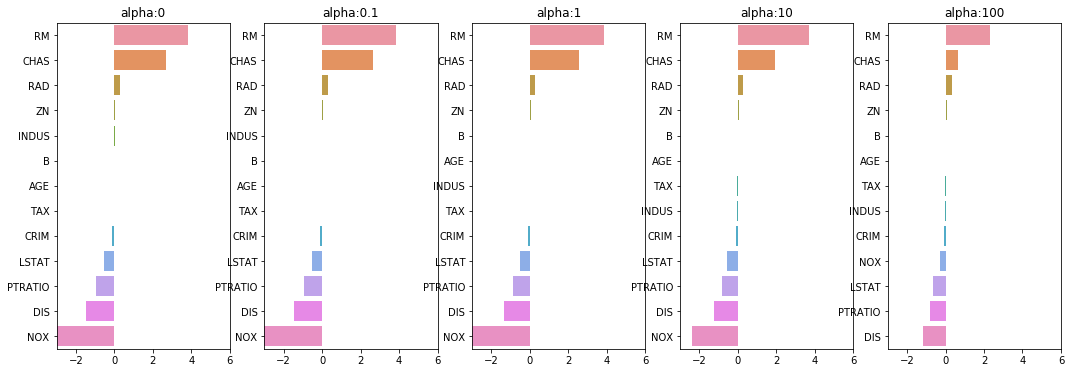

In [16]:
#각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 matplot 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

#각 alpha에 따른 회귀 꼐수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df=pd.DataFrame()

#alphas 리스트 값을 차례로 입력하여 회귀 계수 값 시각화 및 데이터 저장
for pos, alpha in enumerate(alphas):
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    
    #alpha에 따른 feature별 회귀 계수를 Series로 변환하여 DataFrame 칼럼으로 추가
    coeff=pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname]=coeff
    
    #막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화 (내림차순 정렬)
    coeff=coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
plt.show()

In [17]:
ridge_alphas=[0, 0.1, 1, 10, 100]
sort_column='alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


# Lasso Regression

In [18]:
from sklearn.linear_model import Lasso

In [19]:
#alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df=pd.DataFrame()
    if verbose:
        print('######',model_name,'######')
    for param in params:
        if model_name=='Ridge':
            model=Ridge(alpha=param)
        elif model_name=='Lasso':
            model=Lasso(alpha=param)
        neg_mse_scores=cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5-fold 세트의 평균 RMSE:{1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data_n, y_target_n)
        
        if return_coeff:
            coeff=pd.Series(data=model.coef_, index=X_data_n.columns)
            colname='alpha:'+str(param)
            coeff_df[colname]=coeff
    return coeff_df

In [20]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

###### Lasso ######
alpha 0.07일 때 5-fold 세트의 평균 RMSE:5.612
alpha 0.1일 때 5-fold 세트의 평균 RMSE:5.615
alpha 0.5일 때 5-fold 세트의 평균 RMSE:5.669
alpha 1일 때 5-fold 세트의 평균 RMSE:5.776
alpha 3일 때 5-fold 세트의 평균 RMSE:6.189


In [21]:
sort_column='alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
